NAME:

# INF TC1 - TD6 (2h) - Automates

---

## Objectif du TD

Dans ce TD nous allons introduire les automates, qui sont (en informatique) un modèle de calcul permettant de déterminer si une séquence d'information est valide ou non, selon une règle déterminée. Dans un premier temps nous allons définir des automates simples, et ensuite les implémenter en Python et résoudre des problèmes de complexité croissante.

## Qu'est-ce qu'un automate ?

Un automate est un outil de calcul permettant la validation de séquences d'instructions, à base d'états et de transitions. Un exemple d'automate est un feu tricolore, où :

- les **états** sont la couleur du feu (rouge, vert ou orange)
- les **transitions** les changements possibles de couleurs (du rouge au vert, du vert au orange, et du orange au rouge). 

Les automates permettent donc de formaliser le fonctionnement d'un système et de détecter des erreurs éventuelles qui ne respectent pas les changements pré-définis (en reprenant l'exemple du feu tricolore, passer du vert au rouge directement est une erreur). Les applications des automates sont nombreuses et offrent souvent un code plus facile à écire et lire.

In [ ]:
from IPython.core.display import HTML
HTML('<?xml version="1.0" encoding="UTF-8" standalone="no"?><!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN" "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd"><!-- Generated by graphviz version 7.1.0 (20230121.1956) --><!-- Pages: 1 --><svg width="131pt" height="52pt" viewBox="0.00 0.00 131.00 52.00" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink"><g id="graph0" class="graph" transform="scale(1 1) rotate(0) translate(4 48)"><polygon fill="white" stroke="none" points="-4,4 -4,-48 127,-48 127,4 -4,4"/><g id="node1" class="node"><title>0</title><ellipse fill="none" stroke="black" stroke-width="2" cx="18" cy="-22" rx="18" ry="18"/><text text-anchor="middle" x="18" y="-18.3" font-family="Times,serif" font-size="14.00">0</text></g><g id="node2" class="node"><title>1</title><ellipse fill="none" stroke="black" cx="101" cy="-22" rx="18" ry="18"/><ellipse fill="none" stroke="black" cx="101" cy="-22" rx="22" ry="22"/><text text-anchor="middle" x="101" y="-18.3" font-family="Times,serif" font-size="14.00">1</text></g><g id="edge1" class="edge"><title>0→1</title><path fill="none" stroke="black" d="M36.18,-22C45.15,-22 56.45,-22 67.03,-22"/><polygon fill="black" stroke="black" points="67,-25.5 77,-22 67,-18.5 67,-25.5"/><text text-anchor="middle" x="57.5" y="-25.8" font-family="Times,serif" font-size="14.00">a</text></g></g></svg>')

## Définitions

Un automate possède une structure de données similaire à un graphe orienté, où **chaque nœud représente un état** et un **arc représente une transition possible d'un état à un autre**. Ce graphe est ensuite parcouru à partir de `mots` (par exemple : `aba`), qui sont une suite de symboles (comme les lettres `a` et `b`) permettant de passer d'un état à un autre. L'état initial (unique) est représenté visuellement par un cercle en gras, et le dernier état (il peut y en avoir plusieurs) par un double cercle. Les symboles `a` et `b` constituent l'alphabet de l'automate (il est possible d'utiliser tout type d'alphabet, comme les transitions d'un feu tricolore).

Dans l'exemple ci-dessus, si le mot à lire est `a`, l'automate commence à lire le mot depuis l'état `0` et réalise ensuite une transition vers l'état `1` et s'arrête. Comme l'état `1` est un état final le mot `a` est validé. On parlera de motif pour indiquer les familles de mots validés par un automate, comme par exemple les mots qui commencent par `a` nous notons `a*` (l'astérisque indiquant que tout symbole peut être utilisé).

De manière générale, un automate est défini comme $A = (\Sigma, S, s_{0}, \delta, F)$, avec :

- $\Sigma$, un ensemble fini, non vide de symboles qui est l'alphabet d'entrée
- $S$, un ensemble fini, non vide d'états
- $s_{0}$, l'état initial, élément de $S$
- $\delta$, la fonction de transition d'états: $\delta : S \times \Sigma \rightarrow S$
- $F$ est l'ensemble des états terminaux, un sous-ensemble (éventuellement vide) de $S$

## Dessin d'automates

Pour dessiner des automates, nous utiliserons [Graphviz](https://graphviz.org/), un outil en ligne de commande qui permet de dessiner des graphes basé sur le langage [DOT](https://graphviz.org/doc/info/lang.html). Un exemple d'automate est donné ci-dessous :

```python
from graphviz import Digraph

dot = Digraph()
dot.graph_attr['rankdir'] = 'LR'

dot.node('A', shape='circle', style='bold', label='0')
dot.node('B', shape='doublecircle', label='1')

dot.edge('A', 'B', label='a')
dot.edge('B', 'A', label='a')

dot
``````

**IMPORTANT :** vérifier que le code ci-dessus s'exécute bien (dans la cellule ci-dessous). Si cela n'est pas le cas alors suivez ces [instructions d'installation de la bibliothèque Graphviz](../graphviz.ipynb).

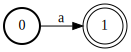

In [1]:
from graphviz import Digraph

dot = Digraph()
dot.graph_attr['rankdir'] = 'LR'

dot.node('0', shape='circle', style='bold', label='0')
dot.node('1', shape='doublecircle', label='1')

dot.edge('0', '1', label='a')

dot

In [ ]:
pip install graphviz 

## Exercice 1 : Automates simples

Dans cette section, nous vous demandons de proposer un automate qui valide un motif donné. Pour les questions 1.1, 1.2 et 1.3, nous considérons un alphabet contenant les lettres `a` et `b` seulement. Vous pouvez répondre aux questions sur papier de préférence, ou utiliser le code ci-dessus du module `graphviz` pour dessiner l'automate.

**Question 1.1 -** Proposer un automate qui contient un nombre paire de fois la lettre `a`.

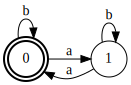

In [3]:
dot = Digraph()
dot.graph_attr['rankdir'] = 'LR'

dot.node('A', shape='doublecircle', style='bold', label='0')
dot.node('B', shape='circle', label='1')

dot.edge('A', 'B', label='a')
dot.edge('B', 'A', label='a')

dot.edge('A', 'A', label='b')
dot.edge('B', 'B', label='b')

dot

**Question 1.2 -** Proposer un automate qui valide le motif `a*a` (les mots qui commencent et finissent par `a`, de taille > 2). 

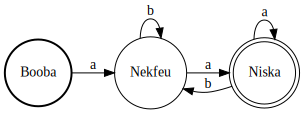

In [11]:
dot = Digraph()
dot.graph_attr['rankdir'] = 'LR'

dot.node('A', shape='circle', style='bold', label='Booba')
dot.node('C', shape='circle', label='Nekfeu')
dot.node('D', shape='doublecircle', label='Niska')

dot.edge('A', 'C', label='a')
dot.edge('C', 'C', label='b')
dot.edge('C', 'D', label='a')
dot.edge('D', 'D', label='a')
dot.edge('D', 'C', label='b')

dot

penser à proposer une liste de mots à valider et à ne pas valider afin de guider les étudiants.

**Question 1.3 -** Quel langage valide l'automate ci-dessous ? Donnez un exemple de mots validés et le langage.

In [12]:
from IPython.core.display import HTML
HTML('<svg width="368pt" height="118pt" viewBox="0.00 0.00 368.00 118.00" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink"><g id="graph0" class="graph" transform="scale(1 1) rotate(0) translate(4 114)"><polygon fill="white" stroke="none" points="-4,4 -4,-114 364,-114 364,4 -4,4"/><g id="node1" class="node"><title>0</title><ellipse fill="none" stroke="black" stroke-width="2" cx="18" cy="-39" rx="18" ry="18"/><text text-anchor="middle" x="18" y="-35.3" font-family="Times,serif" font-size="14.00">0</text></g><g id="node2" class="node"><title>1</title><ellipse fill="none" stroke="black" cx="97" cy="-52" rx="18" ry="18"/><text text-anchor="middle" x="97" y="-48.3" font-family="Times,serif" font-size="14.00">1</text></g><g id="edge1" class="edge"><title>0→1</title><path fill="none" stroke="black" d="M34.18,-47.66C40.16,-50.6 47.21,-53.52 54,-55 58.45,-55.97 63.23,-56.29 67.9,-56.22"/><polygon fill="black" stroke="black" points="67.86,-59.73 77.58,-55.49 67.34,-52.75 67.86,-59.73"/><text text-anchor="middle" x="57.5" y="-58.8" font-family="Times,serif" font-size="14.00">a</text></g><g id="edge2" class="edge"><title>1→0</title><path fill="none" stroke="black" d="M80.82,-43.34C74.84,-40.4 67.79,-37.48 61,-36 56.55,-35.03 51.77,-34.71 47.1,-34.78"/><polygon fill="black" stroke="black" points="47.14,-31.27 37.42,-35.51 47.66,-38.25 47.14,-31.27"/><text text-anchor="middle" x="57.5" y="-39.8" font-family="Times,serif" font-size="14.00">b</text></g><g id="node3" class="node"><title>2</title><ellipse fill="none" stroke="black" cx="176" cy="-52" rx="18" ry="18"/><text text-anchor="middle" x="176" y="-48.3" font-family="Times,serif" font-size="14.00">2</text></g><g id="edge3" class="edge"><title>1→2</title><path fill="none" stroke="black" d="M115.47,-52C124.53,-52 135.83,-52 146.14,-52"/><polygon fill="black" stroke="black" points="146.08,-55.5 156.08,-52 146.08,-48.5 146.08,-55.5"/><text text-anchor="middle" x="136.5" y="-55.8" font-family="Times,serif" font-size="14.00">a</text></g><g id="edge4" class="edge"><title>2→2</title><path fill="none" stroke="black" d="M169,-69.04C167.57,-78.86 169.91,-88 176,-88 179.52,-88 181.79,-84.94 182.8,-80.47"/><polygon fill="black" stroke="black" points="186.3,-80.61 182.97,-70.55 179.3,-80.49 186.3,-80.61"/><text text-anchor="middle" x="176" y="-91.8" font-family="Times,serif" font-size="14.00">a</text></g><g id="node4" class="node"><title>3</title><ellipse fill="none" stroke="black" cx="255" cy="-22" rx="18" ry="18"/><text text-anchor="middle" x="255" y="-18.3" font-family="Times,serif" font-size="14.00">3</text></g><g id="edge5" class="edge"><title>2→3</title><path fill="none" stroke="black" d="M193.33,-45.64C203.13,-41.82 215.84,-36.87 227.09,-32.48"/><polygon fill="black" stroke="black" points="228.24,-35.79 236.28,-28.9 225.7,-29.27 228.24,-35.79"/><text text-anchor="middle" x="215.5" y="-40.8" font-family="Times,serif" font-size="14.00">b</text></g><g id="edge6" class="edge"><title>3→0</title><path fill="none" stroke="black" d="M236.53,-21.08C204.94,-19.69 136.3,-17.91 79,-25 68.32,-26.32 56.76,-28.77 46.67,-31.25"/><polygon fill="black" stroke="black" points="45.9,-27.83 37.1,-33.73 47.66,-34.61 45.9,-27.83"/><text text-anchor="middle" x="136.5" y="-23.8" font-family="Times,serif" font-size="14.00">a</text></g><g id="node5" class="node"><title>4</title><ellipse fill="none" stroke="black" cx="338" cy="-22" rx="18" ry="18"/><ellipse fill="none" stroke="black" cx="338" cy="-22" rx="22" ry="22"/><text text-anchor="middle" x="338" y="-18.3" font-family="Times,serif" font-size="14.00">4</text></g><g id="edge7" class="edge"><title>3→4</title><path fill="none" stroke="black" d="M273.18,-22C282.15,-22 293.45,-22 304.03,-22"/><polygon fill="black" stroke="black" points="304,-25.5 314,-22 304,-18.5 304,-25.5"/><text text-anchor="middle" x="294.5" y="-25.8" font-family="Times,serif" font-size="14.00">a</text></g><g id="edge8" class="edge"><title>4→4</title><path fill="none" stroke="black" d="M333.99,-43.81C333.6,-53.56 334.94,-62 338,-62 339.72,-62 340.9,-59.33 341.53,-55.26"/><polygon fill="black" stroke="black" points="345.02,-55.46 341.95,-45.32 338.03,-55.16 345.02,-55.46"/><text text-anchor="middle" x="338" y="-65.8" font-family="Times,serif" font-size="14.00">a</text></g><g id="edge9" class="edge"><title>4→4</title><path fill="none" stroke="black" d="M331.14,-43.11C328.11,-61.1 330.4,-80 338,-80 344,-80 346.69,-68.23 346.07,-54.43"/><polygon fill="black" stroke="black" points="349.56,-54.19 345.02,-44.62 342.6,-54.93 349.56,-54.19"/><text text-anchor="middle" x="338" y="-83.8" font-family="Times,serif" font-size="14.00">b</text></g></g></g></svg>')

In [ ]:
(a (ba) a (a) b a) *

**Question 1.4 -** Proposer un automate qui valide la propriété suivante : une chaîne de caractères est une adresse email. Les adresses email peuvent être définies comme suit (de manière simplifiée) :

- le premier caractère ne peut pas être un chiffre
- ensuite tous les caractères de `a` à `z` (majuscules et minuscules) et chiffres sont acceptés
- un `@` doit être présent
- ensuite un nom de domaine qui lui aussi ne peut commencer par un chiffre (et doit faire + de 1 caractère)
- un "."
- une extension parmis une liste autorisée (`fr`, `com`, etc)

Un exemple de chaîne qui n'est pas validée est `3toto@a.fr2` car la première partie commence par un chiffre, le nom de domaine est trop court et enfin l'extension n'est pas valide. Pour la partie de validation de l'extension (`.fr`, etc.), vous pouvez simplifier en proposant une reconnaissance de motifs pré-définis (`.fr`, `.com`, etc.). Vous pouvez vous référer à la page Wikipedia [ici](https://fr.wikipedia.org/wiki/Adresse_\%C3\%A9lectronique) ou à la RFC 8222 [ici](https://www.w3.org/Protocols/rfc822/) pour une définition plus précise.


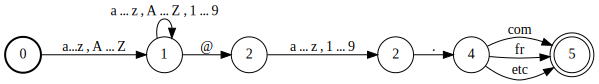

In [16]:
dot = Digraph()
dot.graph_attr['rankdir'] = 'LR'

dot.node('début', shape='circle', style='bold', label='0')
dot.node('lettres', shape='circle', label='1')
dot.node('aro', shape='circle', label='2')
dot.node('aro1', shape='circle', label='2')
dot.node('point', shape='circle', label='4')
dot.node('fin', shape='doublecircle', label='5')

dot.edge('début', 'lettres', label='a...z , A ... Z')
dot.edge('lettres', 'lettres', label='a ... z , A ... Z , 1 ... 9')
dot.edge('lettres', 'aro', label='@')
dot.edge('aro', 'aro1', label='a ... z , 1 ... 9')
dot.edge('aro1', 'point', label='.')
dot.edge('point', 'fin', label='com')
dot.edge('point', 'fin', label='fr')
dot.edge('point', 'fin', label='etc')

dot

## Exercice 2 : Structure de données d'automate en Python

**Question 2.1 -** Nous allons désormais implémenter en Python une structure de données d'automate. Celle-ci doit être en mesure de stocker toutes les informations relatives à la définition d'un automate (symboles reconnu, états, états initiaux/finaux) et valider un mot donné. Votre structure de données peut être composée comme suit :

1. Un constructeur `__init__` qui initialise l'automate avec les symboles du motif (ici `a` et `b`) et les variables d'état interne. En particulier l'état initial.

2. Une méthode `ajout_etat` qui rajoute un nouvel état et s'assure que l'état n'existe pas déjà; un paramètre additionnel `final` indiquera si il s'agit d'un état finaal

3. Une méthode `ajout_transition` qui rajoute un nouvel état et s'assure que l'état n'existe pas déjà.
  
4. Une méthode `recherche_etat` qui étant donné un état source et un symbole, renvoie l'état correspondant (via la transition correspondant au symbole donné).

5. Une fonction `run` qui valide un mot donné, et renvoie `True` si l'état final est atteint et `False`.


In [ ]:
class automate:
# YOUR CODE HERE
raise NotImplementedError()

Voici un exemple attendu d'utilisation de votre structure de données :

In [ ]:
a = automate("ab")

a.ajout_etat("0")
a.ajout_etat("1", True)

a.ajout_transition("0", "b", "0")
a.ajout_transition("0", "a", "1")
a.ajout_transition("1", "a", "1")
a.ajout_transition("1", "b", "1")

assert a.run("abaaaaa") == True
assert a.run("bbb") == False

**Question 2.2 -** Utilisez votre structure de données pour implémenter les automates de la partie précédente.

Question 1.1 (solution) :

In [ ]:
# automate qui valide un nombre pair de fois la lettre "a" avec langage a, b
a = automate("ab")

a.ajout_etat("0", True)
a.ajout_etat("1", False)

a.ajout_transition("0", "a", "1")
a.ajout_transition("1", "a", "0")
a.ajout_transition("0", "b", "0")
a.ajout_transition("1", "b", "1")

# tests valides
assert a.run("") == True
assert a.run("aa") == True
assert a.run("aaaa") == True
assert a.run(''.join("a" for i in range(100))) == True

# tests non-valides
assert a.run("a") == False
assert a.run(''.join("a" for i in range(100 + 1))) == False

Question 1.2 (solution) :

In [ ]:
# automate qui valide a*a
a = automate("ab")

a.ajout_etat("0", False)
a.ajout_etat("1", False)
a.ajout_etat("2", True)

a.ajout_transition("0", "a", "1")
a.ajout_transition("1", "a", "2")
a.ajout_transition("2", "a", "2")

a.ajout_transition("1", "b", "1")
a.ajout_transition("2", "b", "1")

# tests valides
assert a.run("aa") == True
assert a.run("aaaa") == True
assert a.run(''.join("a" for i in range(100))) == True

# tests non-valides
assert a.run("") == False
assert a.run("a") == False
assert a.run("aabb") == False
assert a.run("b") == False

Question 1.3 (solution) :

In [ ]:
# automate qui valide *aaba*
a = automate("ab")

a.ajout_etat("0", False)
a.ajout_etat("1", False)
a.ajout_etat("2", False)
a.ajout_etat("3", False)
a.ajout_etat("4", True)

a.ajout_transition("0", "a", "1")
a.ajout_transition("1", "a", "2")
a.ajout_transition("2", "b", "3")
a.ajout_transition("3", "a", "4")

a.ajout_transition("0", "b", "0")
a.ajout_transition("1", "b", "0")
a.ajout_transition("2", "a", "2")
a.ajout_transition("3", "b", "0")

a.ajout_transition("4", "a", "4")
a.ajout_transition("4", "b", "4")

# tests valides
assert a.run("aaba") == True
assert a.run("aaaaaabaaaaa") == True

# tests non-valides
assert a.run("") == False
assert a.run("a") == False
assert a.run("aabb") == False
assert a.run("b") == False
assert a.run(''.join("a" for i in range(100))) == False

**Question 2.3 (bonus) -** Implémentez une méthode `visualize(self)` afin d'afficher votre automate en utilisant le code `graphviz` fourni dans les questions précédentes. En voici les principales étapes (il s'agit de construire un graphe..) : 

1. Initialiser les sommes
2. Rajouter les arrêtes
3. Inclure les propriétés et labels

**Question 2.4 (bonus) -** Implémentez une méthode `__str__` afin que la commande `print(a)` affiche les états internes à l'automate comme ci-dessous :

```
automate :
   - alphabet   : 'ab'
   - init       : 0
   - final     : ['1']
   - etats (2) :
       - (0)automate :
   - alphabet   : 'ab'
   - init       : 0
   - final     : ['1']
   - etats (2) :
       - (0):
          --(b)--> (0)
          --(a)--> (1)
       - (1):
          --(a)--> (1)
          --(b)--> (1)
```

## Exercice 3 : Analyse de texte avec un automate

Nous allons maintenant développer un programme qui utilise votre structure de données d'automate implémentée en Python dans la section précédente. L'objectif de ce programme sera le suivant : proposer de compléter un mot, à partir d'une séquence de lettres partielle donnée. Par exemple si votre programme prend en entrée la séquence `bon`, en retour vous devez proposer une séquence de lettres pertinentes afin de compléter ce mot comme `bonjour` ou `bonsoir`. 

Vous êtes libres de proposer la stratégie de recommandation de lettres que vous souhaitez. Nous vous proposons de vous baser sur es listes de mots les plus fréquents en Français [ce lien](http://www.pallier.org/extra/liste.de.mots.francais.frgut.txt) (fourni dans le fichier `mots.txt`). Ces mots permettent de réaliser des statistiques de co-occurences. Par exemple, étant donné les mots suivants :

```
  abaissa
  abaissable
  abaissables
  abaissai
  abaissaient
  abaissais
  abaissait
  abaissâmes
```


Si le mot d'entrée est `abaissa` alors votre programme suggère les lettres suivantes ordonnées par ordre de probabilité de transition pour compléter le mot (basé sur l'analyse du fichier `code/mots-10.txt` qui contient les mots ci-dessus):



```
  i (4)
  b (2)
  m (1)
```


Conseils :

1. Utiliser les fichiers de listes de mots (`mots.txt`, ..) en analysant la fréquence de co-occurrences de lettres (autrement dit calculer probabilité d'être l'une après l'autre)

2. Construire un automate dont les transitions sont les probabilités de co-occurence entre les lettres

3. Proposer une méthode de recommandation de transition à partir de quelques lettres fournies en entrée


In [ ]:
# lecture du fichier de mots
data = []
with open("mots-10.txt") as f:
    keys = None
    for line in f:
        l = [w.strip() for w in line.split(';')]
        if keys is None:
            keys = l
        else:
            data.append(l)

# YOUR CODE HERE
raise NotImplementedError()

##  Pour aller plus loin

- Vérifier si les automates sont [déterministes](https://fr.wikipedia.org/wiki/Automate_fini_d%C3%A9terministe)

- Comparer vos résultats avec une implémentation [Python d'Automate](https://pypi.org/project/python-automaton/) :

- Enregistrer les automates en utilisant la commande

`dot.render('graph', format='svg', view=True)`